En este notebook vamos a analizar los datos del archivo explicado en el README.md y lo primero que haremos sera importar los datos donde vamos a revisar las dimensiones del data frame y vamos imprime en consola tanto dichas dimensiones como las primeras filas de datos.

In [1]:
import pandas as pd

datos=pd.read_csv("NASA.csv")
print(datos.shape)
print(datos.columns)

(1503, 6)
Index(['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion'], dtype='object')


Ahora vamos separa el data frame en datos de entrenamiento y datos de prueba con una proporción 70/30. Es decir, el 70% de los datos se usarán para entrenar el modelo y el resto para validar sus resultados.

In [12]:
train=datos.sample(frac=0.7)
test=datos.drop(train.index)
print(train.shape)
print(test.shape)
print(train.head())

(1052, 6)
(451, 6)
      frecuencia  angulo  longitud  velocidad   espesor  presion
1350        2500     6.7    0.1016       71.3  0.004783  131.458
1447         800    12.3    0.1016       39.6  0.040827  122.315
1376        2000     6.7    0.1016       31.7  0.005929  120.446
1060        1250     9.5    0.0254       71.3  0.004207  131.656
959         2500    19.7    0.0508       39.6  0.036484  116.184


Vamos a entrenar un modelo de regresión lineal múltiple, para que las primeras 5 variables del sistema intenten predecir a la sexta

In [13]:
import statsmodels.api as sm
X=train.drop('presion',axis=1)
Y=train.presion
model=sm.OLS(Y,sm.add_constant(X))
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     211.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          6.52e-156
Time:                        21:46:28   Log-Likelihood:                -3154.2
No. Observations:                1052   AIC:                             6320.
Df Residuals:                    1046   BIC:                             6350.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.1185      0.649    205.187      0.0

Como nuestros p-values nos marcan como 0.000 necesitamos MAS sifras significativas entonces vamos a imprimirlas de manera individual

In [15]:
print(results.pvalues)

const          0.000000e+00
frecuencia    4.927916e-113
angulo         1.810469e-17
longitud       1.876491e-63
velocidad      1.262849e-21
espesor        6.819807e-14
dtype: float64


Como podemos observar la Frecuencia nos sirve ya que parece ser una variable significativa garacias a su p-value

Ya con eso vamos a calcula el residual standard error y la 𝑅^2 del modelo, tanto para los datos de entrenamiento como para los datos de validación

In [21]:
import scipy.stats as st
import numpy as np

yhat=results.predict(sm.add_constant(X))
RSS=sum((Y-yhat)**2)
TSS=sum((Y-Y.mean())**2)
n=X.shape[0]
m=X.shape[1]
RSE=np.sqrt(RSS/(n-m-1))
R2=1-RSS/TSS
print("RSE=",RSE)
print("R^2=",R2)

RSE= 4.865692272127964
R^2= 0.5027575235226989


Finalmente, tratemos de visualizar los resultados obtenidos. vams a generar una gráfica de dispersión que cuente con el valor real de Y (presion) en le eje x y de acuerdo al modelo,
para el mismo conjunto de datos en el eje y

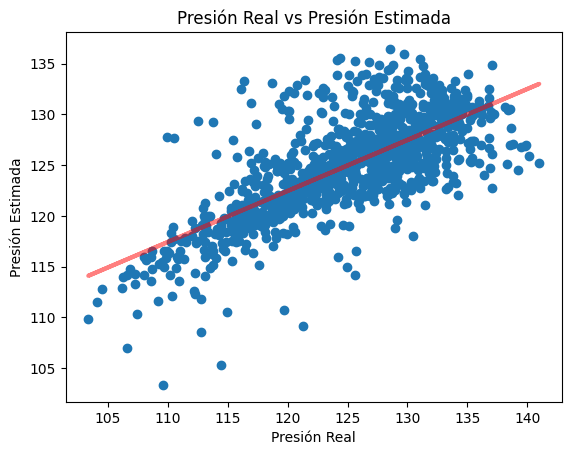

In [31]:
import matplotlib.pyplot as plt
slop,b=np.polyfit(Y,yhat,1)
plt.scatter(Y, yhat)
plt.xlabel('Presión Real')
plt.ylabel('Presión Estimada')
plt.title('Presión Real vs Presión Estimada')
plt.plot(Y,slop*Y+b,c="r",linewidth=3,alpha=0.5)
plt.show()